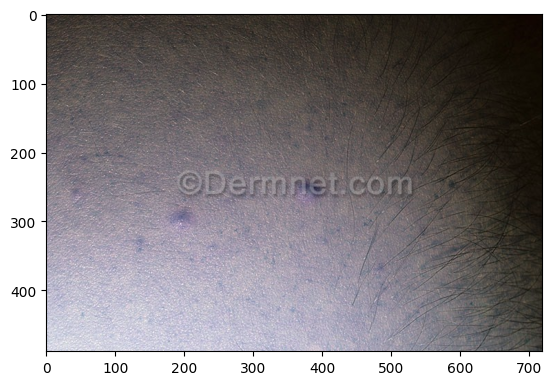

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

DATADIR = r"C:\Users\acer\Downloads\w1867202\SDGP\Dataset"
CATEGORIES = ['Chickenpox','Mild'
#               ,'Monkeypox','Normal','Severe'
             ]

for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
#         plt.show()
#         break
#     break
                
# # import numpy as np
# # import matplotlib.pyplot as plt
# # import os
# # import cv2
# # from tqdm import tqdm

# # DATADIR = "X:/Datasets/PetImages"

# # CATEGORIES = ["Dog", "Cat"]

# for category in CATEGORIES:  # do dogs and cats
#     path = os.path.join(DATADIR,category)  # create path to dogs and cats
#     for img in os.listdir(path):  # iterate over each image per dogs and cats
#         img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
#         plt.imshow(img_array, cmap='gray')  # graph it
#         plt.show()  # display!

# #         break  # we just want one for now so break
# #     break  #...and one more!

In [44]:
print(img_array)

[[[ 63  51  45]
  [ 68  56  50]
  [ 70  58  52]
  ...
  [ 18   7   3]
  [ 18   7   3]
  [ 18   7   3]]

 [[ 48  36  30]
  [ 56  44  38]
  [ 74  62  56]
  ...
  [ 18   7   3]
  [ 18   7   3]
  [ 18   7   3]]

 [[ 67  57  50]
  [ 55  45  38]
  [ 57  47  40]
  ...
  [ 18   7   3]
  [ 18   7   3]
  [ 18   7   3]]

 ...

 [[204 207 221]
  [202 205 219]
  [197 200 214]
  ...
  [ 59  60  58]
  [ 58  59  57]
  [ 62  63  61]]

 [[194 200 213]
  [186 192 205]
  [206 209 223]
  ...
  [ 59  60  58]
  [ 60  61  59]
  [ 68  69  67]]

 [[191 198 213]
  [197 204 219]
  [213 218 233]
  ...
  [ 68  71  69]
  [ 69  70  68]
  [ 72  73  71]]]


In [45]:
print(img_array.shape)

(489, 720, 3)


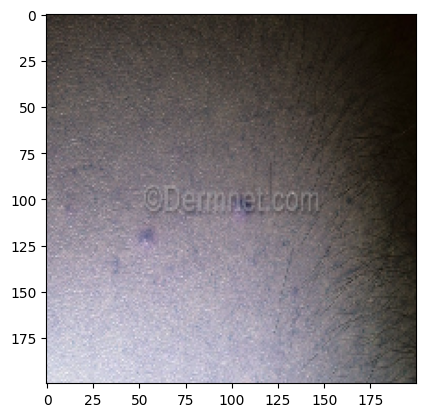

In [46]:
IMG_SIZE = 200

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array)
plt.show()

In [47]:
# new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
# plt.imshow(new_array, cmap='gray')
# # plt.show()
      

In [48]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

In [49]:
create_training_data()

print(len(training_data))

100%|██████████| 342/342 [00:01<00:00, 199.41it/s]

449


In [50]:
# shuffle training data
import random

random.shuffle(training_data)
# print(training_data)

In [51]:
#check shuffle
for x in training_data[:10]:
    print(x[1])


1
0
1
1
1
0
1
1
1
0


In [52]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
    

[[[[169]
   [158]
   [147]
   ...
   [128]
   [137]
   [135]]

  [[165]
   [166]
   [169]
   ...
   [140]
   [129]
   [136]]

  [[161]
   [147]
   [151]
   ...
   [136]
   [141]
   [136]]

  ...

  [[ 44]
   [ 38]
   [ 61]
   ...
   [ 40]
   [ 38]
   [ 33]]

  [[ 46]
   [ 30]
   [ 54]
   ...
   [ 41]
   [ 38]
   [ 36]]

  [[ 32]
   [ 32]
   [ 54]
   ...
   [ 28]
   [ 33]
   [ 29]]]]


In [53]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [54]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

In [55]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

import pickle

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

X = X/255.0

model = Sequential()

model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [56]:
s, v = np.asarray(X), np.asarray(y)
# model.fit(s, v, epochs=10)

model.fit(s, v, batch_size=32, epochs=3, validation_split=0.1)

Epoch 1/3
13/13 [==============================] - 223s 17s/step - loss: 4.1216 - accuracy: 0.6980 - val_loss: 0.4628 - val_accuracy: 0.7778
Epoch 2/3
13/13 [==============================] - 195s 15s/step - loss: 0.4356 - accuracy: 0.7624 - val_loss: 0.3935 - val_accuracy: 0.7556
Epoch 3/3
13/13 [==============================] - 190s 15s/step - loss: 0.3777 - accuracy: 0.7921 - val_loss: 0.3541 - val_accuracy: 0.7778


In [57]:

model.fit(s, v, batch_size=32, epochs=3, validation_split=0.6)

Epoch 1/3
6/6 [==============================] - 118s 21s/step - loss: 0.3268 - accuracy: 0.7989 - val_loss: 0.3780 - val_accuracy: 0.7593
Epoch 2/3
6/6 [==============================] - 118s 21s/step - loss: 0.3034 - accuracy: 0.8268 - val_loss: 0.3406 - val_accuracy: 0.8852
Epoch 3/3
6/6 [==============================] - 118s 21s/step - loss: 0.2742 - accuracy: 0.8883 - val_loss: 0.2685 - val_accuracy: 0.9333
